#Improving Computer Vision Accuracy using Convolutions

지금까지 Deep Neural Network (DNN) 를 이용해서 패션 mnist 를 분류했다.  

In [1]:
import tensorflow as tf
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train.shape

(60000, 28, 28)

In [10]:
import matplotlib.pyplot as plt

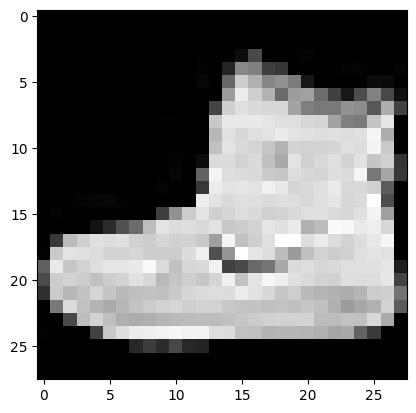

In [11]:
plt.imshow(X_train[0] , cmap='gray')
plt.show()

정확도가, 트레이닝셋은 89% 정도이고 테스트셋으로는  87% 정도가 나왔다.

이제 Convolutional Neural Networks 이용해서 정확도를 향상시켜본다.




In [13]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow import keras

In [14]:
# (28, 28, 1)
def build_model( input_shape ) :
  model = Sequential()
  model.add( keras.Input(shape = input_shape))
  model.add( Conv2D(filters=64, kernel_size=(3,3), activation=keras.activations.relu  ) )
  model.add( MaxPooling2D(pool_size= (2,2), strides= 2 ) )
  model.add( Conv2D(filters=40, kernel_size=(3,3), activation=keras.activations.relu  ) )
  model.add( MaxPooling2D(pool_size= (2,2), strides= 2 ) )

  model.add( Flatten() )
  model.add( Dense(128, keras.activations.relu))
  model.add( Dense(10, keras.activations.softmax))
  model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=[keras.metrics.SparseCategoricalAccuracy()])
  return model


In [22]:
model = build_model( (28, 28, 1) )

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 40)     │        23,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       128,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,138 (598.20 KB)

 Trainable params: 153,138 (598.20 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(X_train, y_train, epochs=18, validation_data=(X_test, y_test))

Epoch 1/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.6291 - sparse_categorical_accuracy: 0.7741 - val_loss: 0.3585 - val_sparse_categorical_accuracy: 0.8737
Epoch 2/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3248 - sparse_categorical_accuracy: 0.8813 - val_loss: 0.3150 - val_sparse_categorical_accuracy: 0.8835
Epoch 3/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2673 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.2807 - val_sparse_categorical_accuracy: 0.8987
Epoch 4/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.2349 - sparse_categorical_accuracy: 0.9140 - val_loss: 0.2685 - val_sparse_categorical_accuracy: 0.9027
Epoch 5/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2047 - sparse_categorical_accuracy: 0.9230 - val_loss: 0.2687 - val_sparse_categorical_accuracy: 0.8976
Epoch 6/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.1875 - sparse_categorical_accuracy: 0.9299 - val_loss: 0.2605 - val_sparse_categorical_accura

In [18]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2599 - sparse_categorical_accuracy: 0.9125


[0.2554378807544708, 0.9117000102996826]

In [27]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

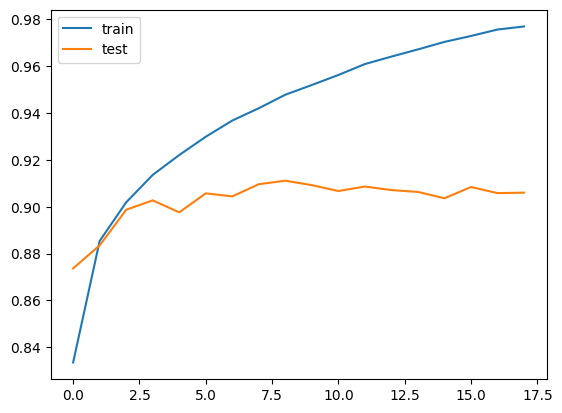

In [28]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

트레이닝셋은 93% , 테스트셋은 91% 까지 나온다.


에포크를 20까지 해보면, 트레이닝셋 정확도는 올라가지만 밸리데이션 정확도는 내려간다. 즉, 오버핏팅이 된다.







```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```
